<div class="alert alert-danger" role="alert">
    <span style="font-size:20px">&#9888;</span> <span style="font-size:16px">This is a read-only notebook! If you want to make and save changes, save a copy by clicking on <b>File</b> &#8594; <b>Save a copy</b>. If this is already a copy, you can delete this cell.</span>
</div>

<h1>Fit distributions to data<span class="tocSkip"></span></h1>

This Jupyter Notebook provides examples of how to fit data to distributions. Many distributions can be fitted directly using scipy's capabilities, while more complex ones may require optimization. 

Please let us know if you create code for new distributions / fitting methods, and we'll add it to this notebook. Email daniel.wang@oliverwyman.com

In [81]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

<h1>Table of Contents<span class="tocSkip"></span></h1>
<ul class="toc-item"><li><span><a href="#Load-your-data" data-toc-modified-id="Load-your-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load your data</a></span></li><li><span><a href="#Fit-to-standard-scipy-distributions" data-toc-modified-id="Fit-to-standard-scipy-distributions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fit to standard scipy distributions</a></span><ul class="toc-item"><li><span><a href="#Log-normal" data-toc-modified-id="Log-normal-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Log-normal</a></span></li><li><span><a href="#Normal-distribution" data-toc-modified-id="Normal-distribution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Normal distribution</a></span></li><li><span><a href="#Student-t-distribution" data-toc-modified-id="Student-t-distribution-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Student t-distribution</a></span></li><li><span><a href="#Pareto-distribution" data-toc-modified-id="Pareto-distribution-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Pareto distribution</a></span></li><li><span><a href="#Truncated-distributions-(using-scipy's-methods)" data-toc-modified-id="Truncated-distributions-(using-scipy's-methods)-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Truncated distributions (using scipy's methods)</a></span></li></ul></li><li><span><a href="#Censored-distributions" data-toc-modified-id="Censored-distributions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Censored distributions</a></span><ul class="toc-item"><li><span><a href="#Method-using-Scipy's-built-in-CensoredData" data-toc-modified-id="Method-using-Scipy's-built-in-CensoredData-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Method using Scipy's built in CensoredData</a></span><ul class="toc-item"><li><span><a href="#Lognormal-on-censored-data" data-toc-modified-id="Lognormal-on-censored-data-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Lognormal on censored data</a></span></li></ul></li><li><span><a href="#Method-without-using-scipy's-CensoredData-class-(needs-work)" data-toc-modified-id="Method-without-using-scipy's-CensoredData-class-(needs-work)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Method without using scipy's CensoredData class (needs work)</a></span></li></ul></li><li><span><a href="#Non-standard-distributions-(TBC)" data-toc-modified-id="Non-standard-distributions-(TBC)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Non-standard distributions (TBC)</a></span></li><li><span><a href="#Mixture-distributions-(TBC)" data-toc-modified-id="Mixture-distributions-(TBC)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Mixture distributions (TBC)</a></span></li></ul>

# Load your data

Read in your data here. In this example, we generate a vector of 100 values to be used.

In [2]:
# This is just an example. Replace it with your actual data.
data = np.random.lognormal(mean=1., sigma=.4, size=100)

# Fit to standard scipy distributions

Scipy provides a lot of distributions: 
    https://docs.scipy.org/doc//scipy/reference/stats.html
    
The fit method of the univariate continuous distributions uses maximum likelihood estimation to fit the distribution to a data set. The fit method can accept regular data or censored data. Censored data is represented with instances of the CensoredData class.

## Log-normal

In [3]:
# The scipy.stats.lognorm.fit function returns the shape parameter (sigma), location parameter (mu), and scale parameter (exp(mu)).
sigma, loc, scale = stats.lognorm.fit(data, floc=0)

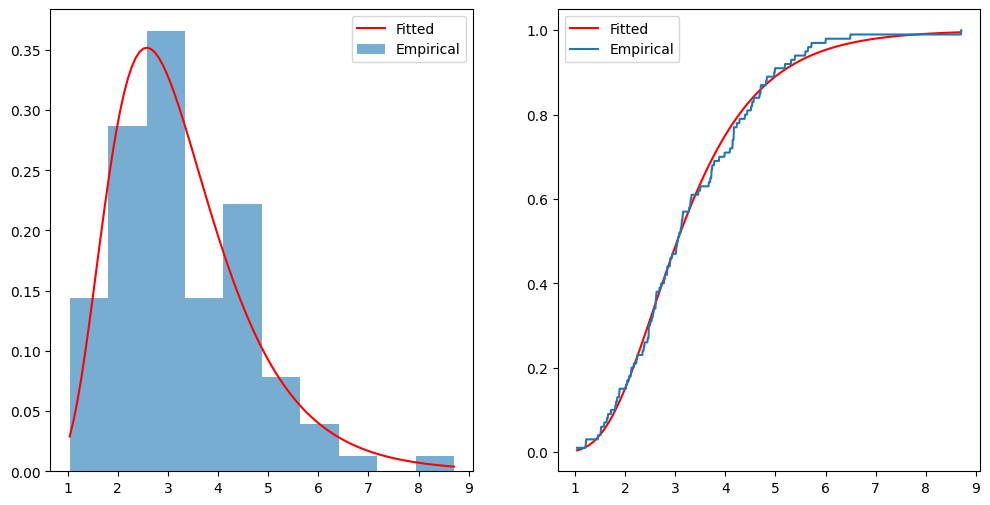

In [4]:
# Generate the x values for the fitted PDF
x = np.linspace(min(data), max(data), 100)

# Generate the fitted PDF
pdf_fitted = stats.lognorm.pdf(x, sigma, loc=loc, scale=scale)

# Generate the empirical CDF
ecdf = stats.cumfreq(data, numbins=1000)

# Generate the fitted CDF
cdf_fitted = stats.lognorm.cdf(x, sigma, loc=loc, scale=scale)

# Plot the fitted PDF and CDF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, pdf_fitted, 'r-', label='Fitted')
plt.hist(data, density=True, alpha=0.6, label='Empirical')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, cdf_fitted, 'r-', label='Fitted')
plt.plot(ecdf.lowerlimit + np.linspace(0, ecdf.binsize*ecdf.cumcount.size, ecdf.cumcount.size), ecdf.cumcount/ecdf.cumcount.max(), label='Empirical')
plt.legend()
plt.show()

In [6]:
# CvM statistic
cvms = stats.cramervonmises(data, 'lognorm', args=(sigma, loc, scale))

# A-D statistic
ads = stats.anderson_ksamp([data, stats.lognorm.rvs(sigma, loc=loc, scale=scale, size=len(data))])

# KS statistic
kss = stats.kstest(data, 'lognorm', args=(sigma, loc, scale))

print(f'CvM statistic: {cvms.statistic}\nA-D statistic: {ads.statistic}\nKS statistic: {kss.statistic}')
print(f'CvM p-value: {cvms.pvalue}\nA-D pvalue: {ads.significance_level}\nKS pvalue: {kss.pvalue}')

CvM statistic: 0.042267410447666694
A-D statistic: -0.9030457336635278
KS statistic: 0.0539445886837111
CvM p-value: 0.9220551021753847
A-D pvalue: 0.25
KS pvalue: 0.9177380811073789


C:\Users\daniel.wang\AppData\Local\Temp\ipykernel_24860\1542637885.py:5: UserWarning: p-value capped: true value larger than 0.25
  ads = stats.anderson_ksamp([data, stats.lognorm.rvs(sigma, loc=loc, scale=scale, size=len(data))])


**Please note that the Anderson-Darling test implemented in `scipy.stats.anderson_ksamp` is a two-sample test and requires two samples as input. In this case, we generate a new sample from the fitted distribution with the same size as the empirical data. This might not be the most accurate way to calculate the A-D statistic for a fitted distribution, but `scipy` currently does not provide a one-sample A-D test for arbitrary distributions.**

## Normal distribution

In [5]:
# The scipy.stats.norm.fit function returns the mean (mu) and standard deviation (sigma).
mu, sigma = stats.norm.fit(data)

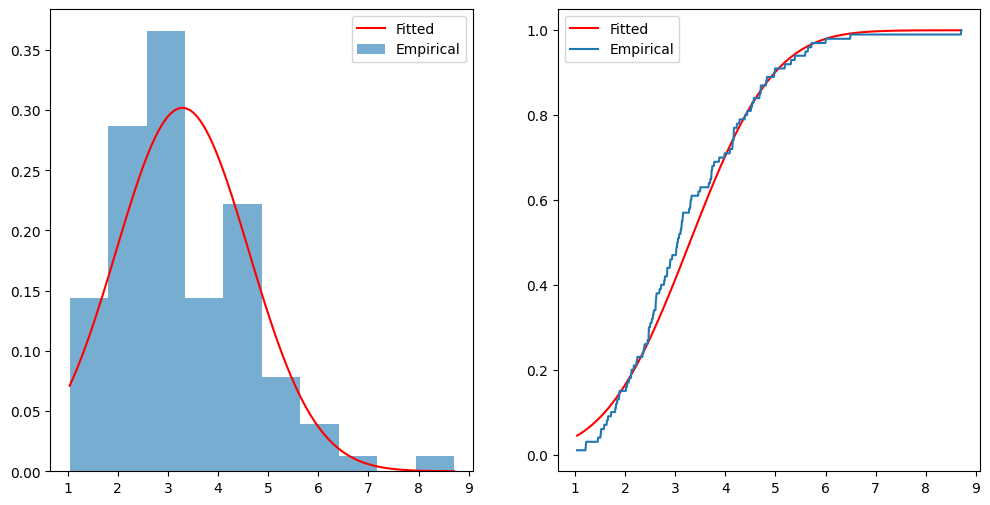

In [6]:
# Generate the x values for the fitted PDF
x = np.linspace(min(data), max(data), 100)

# Generate the fitted PDF
pdf_fitted = stats.norm.pdf(x, mu, sigma)

# Generate the fitted CDF
cdf_fitted = stats.norm.cdf(x, mu, sigma)

# Plot the fitted PDF and CDF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, pdf_fitted, 'r-', label='Fitted')
plt.hist(data, density=True, alpha=0.6, label='Empirical')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, cdf_fitted, 'r-', label='Fitted')
plt.plot(ecdf.lowerlimit + np.linspace(0, ecdf.binsize*ecdf.cumcount.size, ecdf.cumcount.size), ecdf.cumcount/ecdf.cumcount.max(), label='Empirical')
plt.legend()
plt.show()

In [7]:
# CvM statistic
cvms = stats.cramervonmises(data, 'norm', args=(mu, sigma))

# A-D statistic
ads = stats.anderson_ksamp([data, stats.norm.rvs(mu, sigma, size=len(data))])

# KS statistic
kss = stats.kstest(data, 'norm', args=(mu, sigma))

print(f'CvM statistic: {cvms.statistic}\nA-D statistic: {ads.statistic}\nKS statistic: {kss.statistic}')
print(f'CvM p-value: {cvms.pvalue}\nA-D pvalue: {ads.significance_level}\nKS pvalue: {kss.pvalue}')

CvM statistic: 0.17951020800637435
A-D statistic: 0.08315934690697416
KS statistic: 0.10891544799975844
CvM p-value: 0.3112766291848077
A-D pvalue: 0.25
KS pvalue: 0.17312251621620156


C:\Users\daniel.wang\AppData\Local\Temp\ipykernel_93372\1693328082.py:5: UserWarning: p-value capped: true value larger than 0.25
  ads = stats.anderson_ksamp([data, stats.norm.rvs(mu, sigma, size=len(data))])


## Student t-distribution

In [8]:
# The `scipy.stats.t.fit` function returns the degrees of freedom (df), location parameter (loc), and scale parameter (scale).
df, loc, scale = stats.t.fit(data)

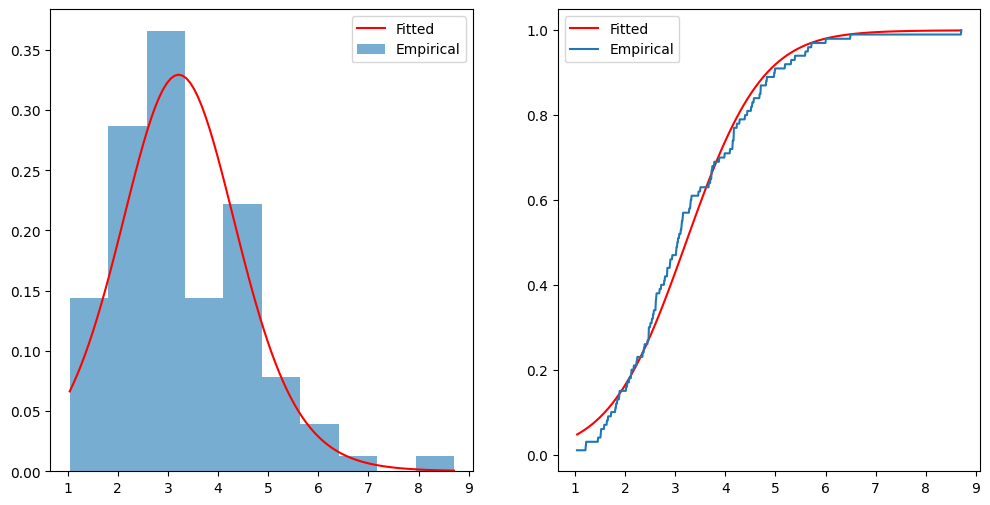

In [9]:
# Generate the x values for the fitted PDF
x = np.linspace(min(data), max(data), 100)

# Generate the fitted PDF
pdf_fitted = stats.t.pdf(x, df, loc, scale)

# Generate the fitted CDF
cdf_fitted = stats.t.cdf(x, df, loc, scale)

# Plot the fitted PDF and CDF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, pdf_fitted, 'r-', label='Fitted')
plt.hist(data, density=True, alpha=0.6, label='Empirical')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, cdf_fitted, 'r-', label='Fitted')
plt.plot(ecdf.lowerlimit + np.linspace(0, ecdf.binsize*ecdf.cumcount.size, ecdf.cumcount.size), ecdf.cumcount/ecdf.cumcount.max(), label='Empirical')
plt.legend()
plt.show()

In [10]:
# CvM statistic
cvms = stats.cramervonmises(data, 't', args=(df, loc, scale))

# A-D statistic
ads = stats.anderson_ksamp([data, stats.t.rvs(df, loc, scale, size=len(data))])

# KS statistic
kss = stats.kstest(data, 't', args=(df, loc, scale))

print(f'CvM statistic: {cvms.statistic}\nA-D statistic: {ads.statistic}\nKS statistic: {kss.statistic}')
print(f'CvM p-value: {cvms.pvalue}\nA-D pvalue: {ads.significance_level}\nKS pvalue: {kss.pvalue}')

CvM statistic: 0.12971546167923687
A-D statistic: -0.39073768772532647
KS statistic: 0.08770335878945007
CvM p-value: 0.45841926764652496
A-D pvalue: 0.25
KS pvalue: 0.40208327309945724


C:\Users\daniel.wang\AppData\Local\Temp\ipykernel_93372\3067307372.py:5: UserWarning: p-value capped: true value larger than 0.25
  ads = stats.anderson_ksamp([data, stats.t.rvs(df, loc, scale, size=len(data))])


## Pareto distribution



In [11]:
# The `scipy.stats.pareto.fit` function returns the shape parameter (b), location parameter (loc), and scale parameter (scale).
b, loc, scale = stats.pareto.fit(data)

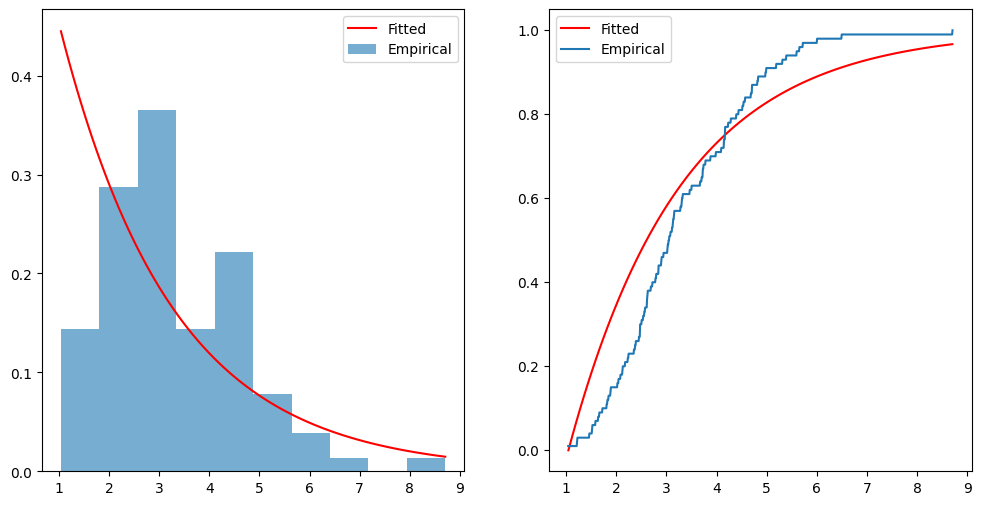

In [12]:
# Generate the x values for the fitted PDF
x = np.linspace(min(data), max(data), 100)

# Generate the fitted PDF
pdf_fitted = stats.pareto.pdf(x, b, loc, scale)

# Generate the fitted CDF
cdf_fitted = stats.pareto.cdf(x, b, loc, scale)

# Plot the fitted PDF and CDF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, pdf_fitted, 'r-', label='Fitted')
plt.hist(data, density=True, alpha=0.6, label='Empirical')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, cdf_fitted, 'r-', label='Fitted')
plt.plot(ecdf.lowerlimit + np.linspace(0, ecdf.binsize*ecdf.cumcount.size, ecdf.cumcount.size), ecdf.cumcount/ecdf.cumcount.max(), label='Empirical')
plt.legend()
plt.show()

In [13]:
# CvM statistic
cvms = stats.cramervonmises(data, 'pareto', args=(b, loc, scale))

# A-D statistic
ads = stats.anderson_ksamp([data, stats.pareto.rvs(b, loc, scale, size=len(data))])

# KS statistic
kss = stats.kstest(data, 'pareto', args=(b, loc, scale))

print(f'CvM statistic: {cvms.statistic}\nA-D statistic: {ads.statistic}\nKS statistic: {kss.statistic}')
print(f'CvM p-value: {cvms.pvalue}\nA-D pvalue: {ads.significance_level}\nKS pvalue: {kss.pvalue}')

CvM statistic: 1.3980765471293874
A-D statistic: 4.145087614547582
KS statistic: 0.2124473887339253
CvM p-value: 0.00027526376362418947
A-D pvalue: 0.007124023683101159
KS pvalue: 0.00019367785448953513


## Truncated distributions (using scipy's methods)

Scipy offers fitting to the following truncated distributions out of the box.

- truncexpon: A truncated exponential continuous random variable.
- truncnorm: A truncated normal continuous random variable.
- truncpareto: An upper truncated Pareto continuous random variable.
- truncweibull_min: A doubly truncated Weibull minimum continuous random variable.

In [36]:
# The `scipy.stats.truncnorm.fit` function returns the left truncation, right truncation, mean, and standard deviation.
# a, b = (a_trunc - loc) / scale, (b_trunc - loc) / scale
a, b, loc, scale = stats.truncnorm.fit(data)

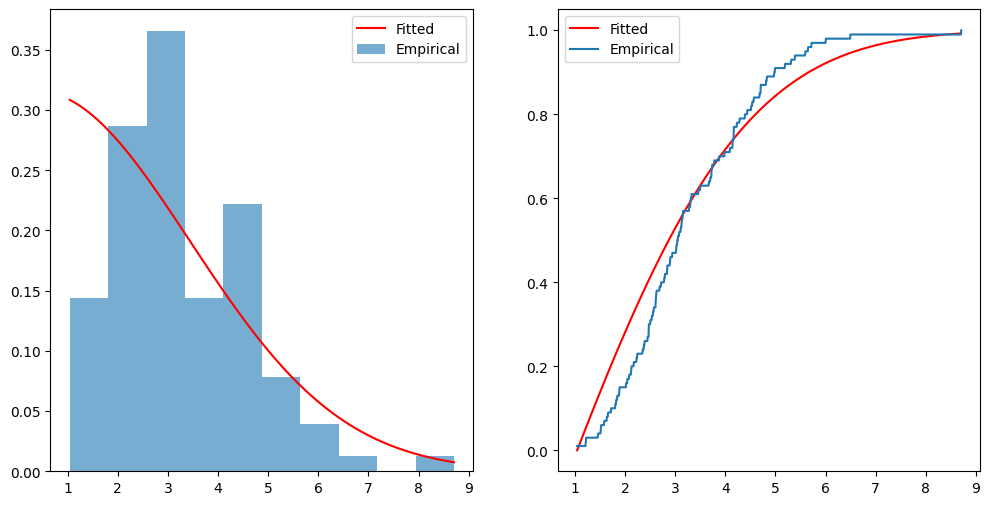

In [37]:
# Generate the x values for the fitted PDF
x = np.linspace(min(data), max(data), 100)

# Generate the fitted PDF
pdf_fitted = stats.truncnorm.pdf(x, a, b, loc, scale)

# Generate the fitted CDF
cdf_fitted = stats.truncnorm.cdf(x, a, b, loc, scale)

# Plot the fitted PDF and CDF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, pdf_fitted, 'r-', label='Fitted')
plt.hist(data, density=True, alpha=0.6, label='Empirical')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, cdf_fitted, 'r-', label='Fitted')
plt.plot(ecdf.lowerlimit + np.linspace(0, ecdf.binsize*ecdf.cumcount.size, ecdf.cumcount.size), ecdf.cumcount/ecdf.cumcount.max(), label='Empirical')
plt.legend()
plt.show()

# Censored distributions

In [38]:
# Generate some lognormal data
np.random.seed(0)
data = np.random.lognormal(mean=1., sigma=1.2, size=100)

# Censor the data
censoring_point = 10
censored_data = np.where(data > censoring_point, censoring_point, data)

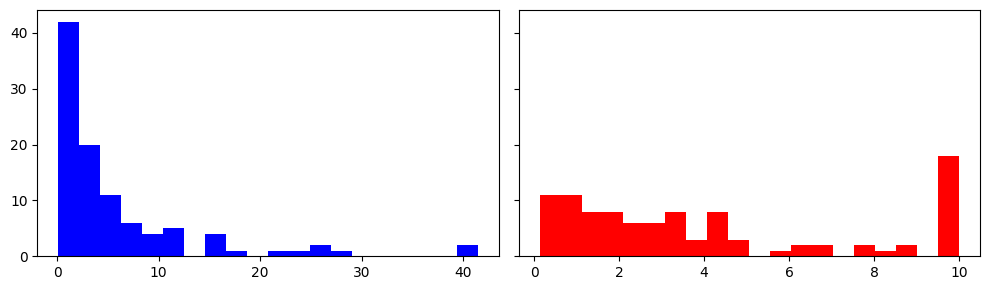

In [39]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True, figsize=(10,3))
axs[0].hist(data, bins=20, color='b')
axs[1].hist(censored_data, bins=20, color='r')
plt.show()

## Method using Scipy's built in CensoredData
The fitting methods can be used on Censored data put into this format https://docs.scipy.org/doc//scipy/reference/generated/scipy.stats.CensoredData.html

If you get an error saying "cannot import name 'CensoredData' from 'scipy.stats'", then you need to update to a newer version of scipy. In your command prompt, run ```pip install scipy --upgrade```

In [40]:
from scipy.stats import CensoredData

censoring_indicator = censored_data == censoring_point
censored_data_2 = CensoredData.right_censored(censored_data, censoring_indicator)

### Lognormal on censored data

In [41]:
# The scipy.stats.lognorm.fit function returns the shape parameter (sigma), location parameter (mu), and scale parameter (exp(mu)).
sigma, loc, scale = stats.lognorm.fit(censored_data_2, floc=0)
print(sigma, loc, scale)

1.2247346848169416 0 2.9336922137588815


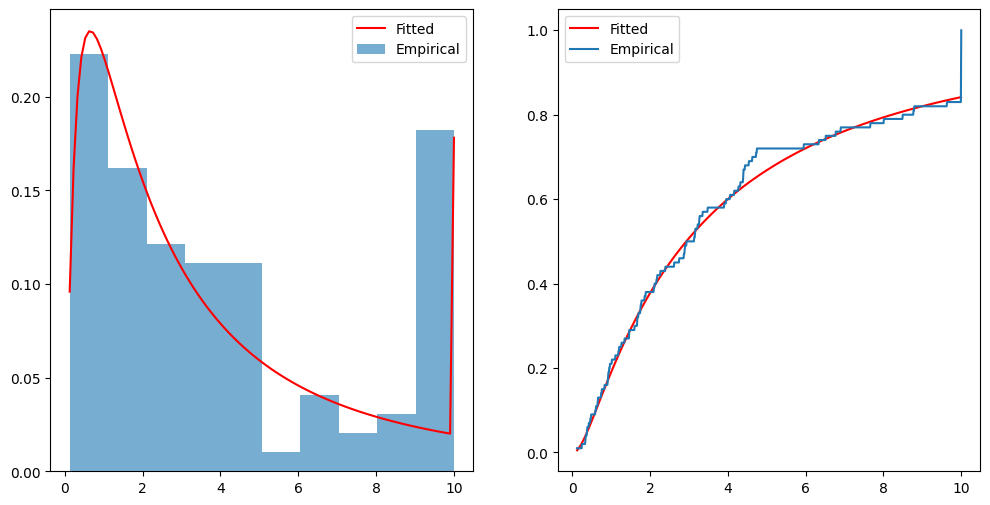

In [63]:
# Generate the x values for the fitted PDF
x = np.linspace(min(censored_data), max(censored_data), 100)

# Generate the fitted PDF
pdf_fitted = stats.lognorm.pdf(x, sigma, loc=loc, scale=scale)
pdf_fitted[-1] = pdf_fitted[-1] + (1-stats.lognorm.cdf(censoring_point, sigma, loc=loc, scale=scale))

# Generate the empirical CDF
ecdf = stats.cumfreq(censored_data, numbins=1000)

# Generate the fitted CDF
cdf_fitted = stats.lognorm.cdf(x, sigma, loc=loc, scale=scale)

# Plot the fitted PDF and CDF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, pdf_fitted, 'r-', label='Fitted')
plt.hist(censored_data, density=True, alpha=0.6, label='Empirical')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, cdf_fitted, 'r-', label='Fitted')
plt.plot(ecdf.lowerlimit + np.linspace(0, ecdf.binsize*ecdf.cumcount.size, ecdf.cumcount.size), ecdf.cumcount/ecdf.cumcount.max(), label='Empirical')
plt.legend()
plt.show()

## Method without using scipy's CensoredData class (needs work)

In [67]:
# Fit the distribution
from scipy.optimize import minimize

# use infinite or epsilon perturbation of zero probability observations
use_infinite = False
epsilon = 1e-10

# Define the loss function
def nll(params):
    s, loc, scale = params
    ll_uncensored = stats.lognorm.pdf(censored_data[censored_data < censoring_point], s, loc, scale)
    ll_censored = 1-stats.lognorm.cdf(censored_data[censored_data == censoring_point], s, loc, scale)
    
    if use_infinite and any(ll_uncensored == 0) or any(ll_censored == 0):
        return np.infinite
    else:
        ll_uncensored = np.where(ll_uncensored == 0, epsilon, ll_uncensored)
        ll_censored = np.where(ll_censored == 0, epsilon, ll_censored)
        
        return -(np.sum(np.log(ll_uncensored)) + np.sum(np.log(ll_censored)))
    
# Initial guess for the parameters
initial_guess = [1, 0, np.mean(censored_data)]

# Minimize the negative log-likelihood
result = minimize(nll, initial_guess)
s_hat, loc_hat, scale_hat = result.x
print(s_hat, loc_hat, scale_hat)

1.2813245409260026 0.05215920129268445 2.8385397757579653


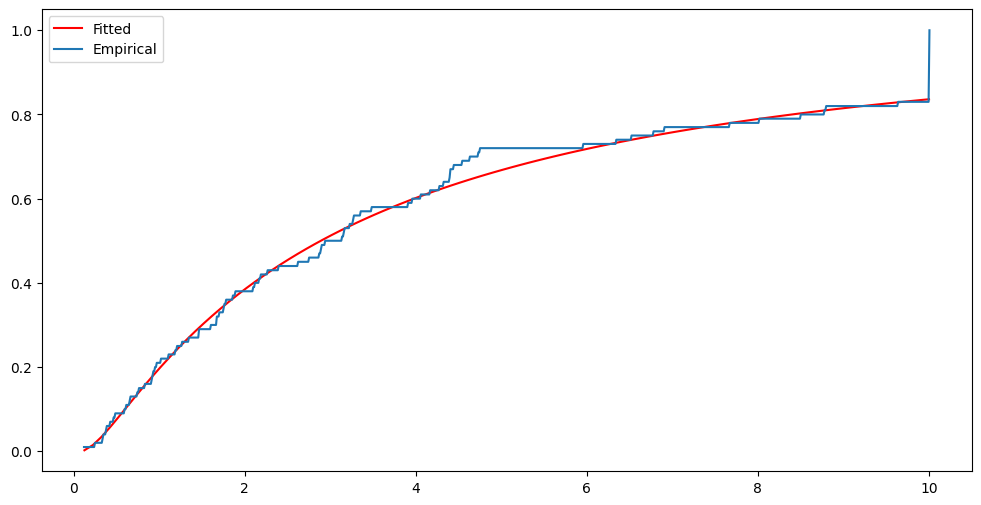

In [80]:
# Generate x values
x = np.linspace(min(censored_data), max(censored_data), 100)

# Generate the fitted CDF
cdf_fitted = stats.lognorm.cdf(x, s_hat, loc_hat, scale_hat)

# Generate the empirical CDF
cdf_empirical = stats.cumfreq(censored_data, numbins=1000)

# Plot the fitted and empirical CDFs
plt.figure(figsize=(12, 6))
plt.plot(x, cdf_fitted, 'r-', label='Fitted')
plt.plot(ecdf.lowerlimit + np.linspace(0, ecdf.binsize*ecdf.cumcount.size, ecdf.cumcount.size), ecdf.cumcount/ecdf.cumcount.max(), label='Empirical')
plt.legend()
plt.show()


# Non-standard distributions (TBC)

Distributions that require optimization to fit. E.g. an upper truncated log-normal distribution. 

# Mixture distributions (TBC)